# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2

## Actividad en clase

1. Trabaje sobre estos datos:

```python
from sklearn.datasets import fetch_covtype

X, y = fetch_covtype(return_X_y=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5_000, test_size=10_000, random_state=42, stratify=y)
```

2. Usando el algoritmo **SVC**, haga lo siguiente:

2.1 Cree un clasificador **SVC** sobre datos estandarizados usando el kernel trick con kernels lineal, polinomial, rbf y sigmoid. Pruebe varias configuraciones para el kernel polinomial. Seleccione el mejor modelo. Evalúe el modelo en la partición de testing usando accuracy_score, classification_report y confusion_matrix_display. Verifique que el problema es muy difícil debido al desbalance de clases.

2.2 Ahora vamos a balancear usando oversampling con la librería imblearn (instálela con pip3). Luego cree el  siguiente pipeline:

```python
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.over_sampling import RandomOverSampler

svc_clf = make_pipeline_with_sampler(
    StandardScaler(), 
    RandomOverSampler(random_state=42),
    SVC(kernel='rbf'),
)
```

2.3 Entrene svc_clf sobre training. Evalúe su nuevo clasificador en testing usando accuracy_score, classification_report y confusion_matrix_display. Fíjese que se observa una mejora pero con un costo. ¿Qué empeora?

- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que cada L es una décima más en la nota de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [1]:
from sklearn.datasets import fetch_covtype

X, y = fetch_covtype(return_X_y=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5_000, test_size=10_000, random_state=42, stratify=y)

In [2]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4, 5, 6]

for kernel_ in kernels:
    if kernel_ == 'poly':
        for degree_ in degrees:
            clf = make_pipeline(StandardScaler(), SVC(kernel=kernel_, degree= degree_))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = metrics.accuracy_score(y_test, y_pred)
            print(
                "For kernel =",
                kernel_,
                "with degree =",
                degree_,
                "The accuracy is :",
                acc,
            )
    else:
        clf = make_pipeline(StandardScaler(), SVC(kernel=kernel_))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        print(
            "For kernel =",
            kernel_,
            "The accuracy is :",
            acc,
        )
    

For kernel = linear The accuracy is : 0.7237
For kernel = poly with degree = 2 The accuracy is : 0.6626
For kernel = poly with degree = 3 The accuracy is : 0.6822
For kernel = poly with degree = 4 The accuracy is : 0.6462
For kernel = poly with degree = 5 The accuracy is : 0.6383
For kernel = poly with degree = 6 The accuracy is : 0.6184
For kernel = rbf The accuracy is : 0.7268
For kernel = sigmoid The accuracy is : 0.6686


In [3]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [4]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.69      0.71      3646
           2       0.74      0.82      0.78      4876
           3       0.64      0.87      0.74       615
           4       0.70      0.15      0.25        47
           5       0.00      0.00      0.00       164
           6       0.53      0.09      0.16       299
           7       0.66      0.59      0.62       353

    accuracy                           0.73     10000
   macro avg       0.57      0.46      0.46     10000
weighted avg       0.71      0.73      0.71     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


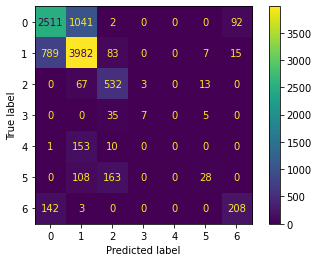

In [5]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

In [6]:
!pip3 install imblearn

In [7]:
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.over_sampling import RandomOverSampler

svc_clf = make_pipeline_with_sampler(
    StandardScaler(), 
    RandomOverSampler(random_state=42),
    SVC(kernel='rbf'),
)

In [8]:
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('svc', SVC())])

In [9]:
y_pred = svc_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.70      0.69      3646
           2       0.81      0.57      0.67      4876
           3       0.68      0.62      0.65       615
           4       0.36      0.68      0.47        47
           5       0.13      0.72      0.21       164
           6       0.33      0.67      0.44       299
           7       0.44      0.87      0.58       353

    accuracy                           0.64     10000
   macro avg       0.49      0.69      0.53     10000
weighted avg       0.72      0.64      0.66     10000



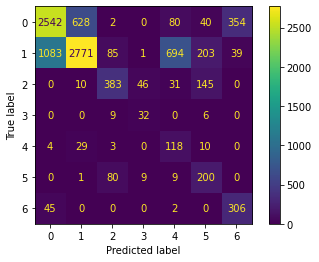

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

#### Fíjese que mejoró el macro avg en F1 pero al costo de empeorar en F1 en las clases mayoritarias. Es decir, SVM funciona muy bien con clases balanceadas. Si los datos están desbalanceados, no funciona bien. Necesitamos algo más.